In [120]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 5: Game of Thrones, Twitter, and Text

## Due Date: Wednesday 11/5, 11:59 pm PST

In this assignment, we will work with Twitter data in order to analyze ~20,000 tweets about the final season of Game of Thrones. Our ultimate goal is to deconstruct tweets into their individual words and assign a sentiment score to each, evaluating the overall sentiment of each tweet toward Game of Thrones.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

In [121]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [122]:
got = pd.read_csv("./data/gotTwitter.csv")
got.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,4/22/2019 3:56,WOMAXO,So Game of Thrones is just basically about who<U+2019>s gonna be the next Hokage?,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,4/15/2019 2:15,BbalEvv,"Is Game of Thrones really that good? Man, it is mentioned anywhere you look today. \n\nWhat’s the big deal? \n\nIs it as good as Billions? We are in the middle of that series. Game of Thrones can’t be as good as Billions. \n\nJust can’t be.",Twitter for iPhone,240
2,x281627203,x1126361110246879232,5/9/2019 5:39,Krachtworks,@ThomasLBarr This is some game of thrones action right here. #TempeThrone,Twitter for iPhone,60
3,x168322273,x1125175463549198337,5/5/2019 23:08,MrCamW,"Before more fan faves potentially perish (?) today, here's my piece on the morality of 'Game of Thrones' and leadership https://t.co/uhPfCoQMeP",Twitter Web Client,143
4,x1472761238,x1128279188786511872,5/14/2019 12:41,jeniecet,Game of Thrones episode 1 season 1. <U+0001F643>,Twitter for iPhone,37


---
# Part 1: Tweet Source Analysis

In the following questions, we are going to first look at the types of devices used when tweeting about Game of Thrones.

First let's examine the source field:

In [123]:
got['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'dlvr.it',
       'Twitter for Android', 'Sprinklr', 'Facebook', 'Twitter Web App',
       'SocialFlow', 'TweetDeck', 'Tweetbot for iΟS', 'Stars TVMag',
       'IFTTT', 'Twibble.io', 'twiteradious', 'Sprout Social',
       'WordPress.com', 'potenciaok', 'DealFinder App', 'Sortiwa News',
       'trueAnthem', 'Post Planner Inc.', 'Google', 'Twitter for iPad',
       'Cloudhopper', 'Instagram', 'Buffer', 'Tweetbot for Mac',
       'Reddit Official', 'Tweetbot for i<U+039F>S', 'Twuffer',
       'Echobox Social', 'the crypto report', 'Talon (Plus)', 'TheWrap',
       'elementarty', 'DiasporaEngager', 'Trakt.tv', 'RiteKit', 'TwNYY',
       'Untappd', 'Hootsuite Inc.', 'SocialOomph',
       'the analytical engine', 'EIN News Publisher',
       'I Just Want To Tweet', 'Heart The Mart', 'AwayToshare',
       'LinkedIn', 'BebaCornish', 'TV Time, TV show tracker', 'Periscope',
       'hassantariqblog', 'Mastodon-Twitter Crossposter', 'Pinterest',

### Question 1.1

That's a ton of apps, so maybe we should zoom in on only the most relevant. Create a barplot representing counts of the 10 most-used devices/apps ("source") in our tweets. 

Text(0.5, 1.0, 'Top 10 Most Used Tweet Sources')

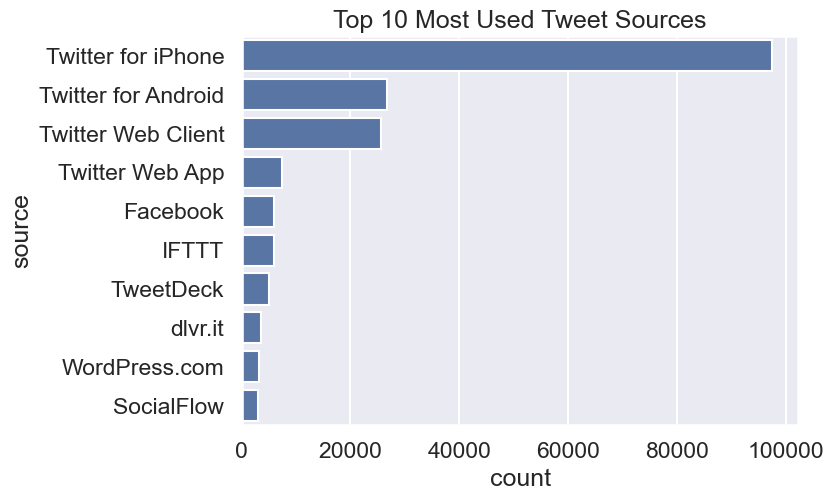

In [124]:
sns.barplot(got["source"].value_counts()[:10], orient="h")
plt.title("Top 10 Most Used Tweet Sources")

### Question 1.2

Our data represents tweets acriss the release window of all 6 final episodes of the series. Let's see if we can determine when these episodes were released based on the frequency of tweets. As a first step, convert `created_at` into a datetime object using `pd.to_datetime`. You can use [this as a reference](https://pandas.pydata.org/docs/reference/api/pandas.Period.strftime.html) when specifying the format. 

In [125]:
got["created_at"].head()

0     4/22/2019 3:56
1     4/15/2019 2:15
2      5/9/2019 5:39
3     5/5/2019 23:08
4    5/14/2019 12:41
Name: created_at, dtype: object

In [126]:
got["created_at"] = pd.to_datetime(got["created_at"], format="%m/%d/%Y %H:%M")
got.head(3)

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,So Game of Thrones is just basically about who<U+2019>s gonna be the next Hokage?,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,"Is Game of Thrones really that good? Man, it is mentioned anywhere you look today. \n\nWhat’s the big deal? \n\nIs it as good as Billions? We are in the middle of that series. Game of Thrones can’t be as good as Billions. \n\nJust can’t be.",Twitter for iPhone,240
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,@ThomasLBarr This is some game of thrones action right here. #TempeThrone,Twitter for iPhone,60


In [127]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Question 1.3

Identify the timespan of the dates in our tweet data.

*Note*: We can treat datetime objects like numeric variables.

In [128]:
print(f"Timespan of tweet dates: {got['created_at'].min()} to {got['created_at'].max()}")

Timespan of tweet dates: 2019-04-07 14:50:00 to 2019-05-28 02:59:00


In [129]:
grader.check("q1_3")

q1_3 results: All test cases passed!

### Question 1.4

Now create a histogram of our newly converted datetime column. You don't need to worry about making the x-axis labels legible for q1_4 and q1_5. 

Text(0, 0.5, 'Frequency')

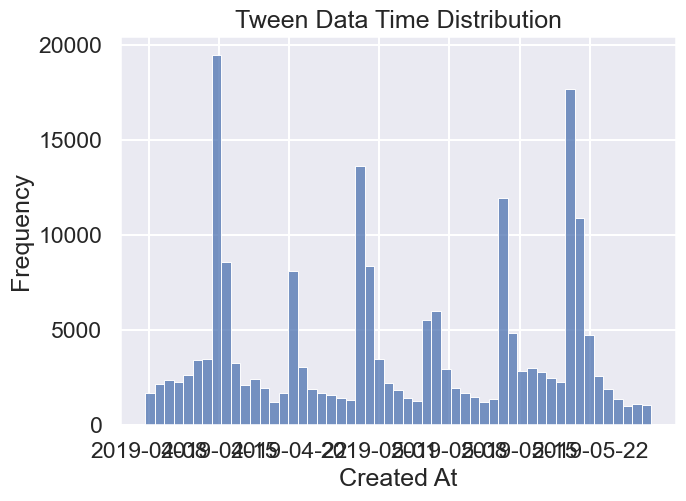

In [130]:
sns.histplot(got["created_at"])
plt.title("Tween Data Time Distribution")
plt.xlabel("Created At")
plt.ylabel("Frequency")

Of the 6 episodes released, which do you think were the most popular or polarizing and which were the least?

**Your response**: I imagine these are season premieres, season finalies, and major plot twist episodes as these will attract the most amount of viewership.

### Question 1.5

Plot three overlapping KDE plots, one each for tweets from "Twitter for iPhone", "Twitter for Android", and "Twitter Web Client".

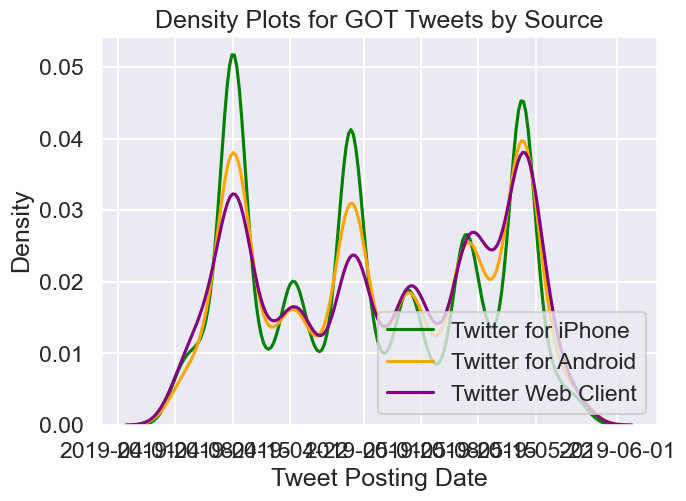

In [131]:
sns.kdeplot(got.query('source == "Twitter for iPhone"')['created_at'], 
            label='Twitter for iPhone', color='green')
sns.kdeplot(got.query('source == "Twitter for Android"')['created_at'], 
            label='Twitter for Android', color='orange')
sns.kdeplot(got.query('source == "Twitter Web Client"')['created_at'], 
            label='Twitter Web Client', color='purple')

plt.title('Density Plots for GOT Tweets by Source')
plt.xlabel('Tweet Posting Date')
plt.legend(loc='lower right')
plt.show()


What do you know notice about how the temporal pattern in tweets from the web app differs from the temporal pattern of the mobile apps. What can you infer from this?

**Your response**: The KDE plot shows that twitter for iphone and android share very similar temporal patterns. They have sharp peaks at the same moments, again likely due to when a new episode airs. Twitter Web client follows this trend as well, but the peaks are lower. This shows that web users are not as focused on tweeting during the episodes whereas iphone and android users are on their phones more and have their phones more accessible to tweet during episodes.

# Part 2: Sentiment Analysis

It turns out that we can use the words in our Game of Thrones tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I loved the episode!" has positive sentiment, whereas the sentence "I hate Cersei!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I loved the episode!" is more positive than "I liked the episode."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of our tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [132]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

The creators of VADER describe the tool’s assessment of polarity, or “compound score,” in the following way:

“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training set of data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 

### Question 2.1

Please score the sentiment of one of the following words:
- police
- order
- Democrat
- Republican
- gun
- dog
- technology
- TikTok
- security
- face-mask
- science
- climate change
- vaccine

What score did you give it and why? Can you think of a situation in which this word would carry the opposite sentiment to the one you’ve just assigned?

**Your response**: I would give "technology" a score of 0.5 as I think there is a lot of talk right now around technology and all the ways that it is evolving. I believe most of these conversations are positive, but with AI, a lot of talk around technology is becoming more negative.

### Question 2.2

VADER aggregates the sentiment of words in order to determine the overall sentiment of a sentence, and further aggregates sentences to assign just one aggregated score to a whole tweet or collection of tweets. This is a complex process and if you'd like to learn more about how VADER aggregates sentiment, here is the info at this [link](https://github.com/cjhutto/vaderSentiment#introduction).

Are there circumstances (e.g. certain kinds of language or data) when you might not want to use VADER? What features of human speech might VADER misrepresent or fail to capture?


**Your response**: VADAR is a good tool, but it relies on a fixed dictionary of words with pre-assigned scores. This is good for fast analysis, but can fail when language gets more complex. VADAR cannot account for the context of words, just analyzes single words.

### Question 2.3

Read `vader_lexicon.txt` into a DataFrame called `sent`. `sent` should have two columns named `word` and `polarity`, storing the polarity of each word.

In [133]:
sent = pd.read_csv("vader_lexicon.txt", sep="\t", header=None, names=["word", "polarity", "1", "2"])
sent.head()

,word,polarity,1,2
0,$:,-1.5,0.80623,"[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]"
1,%),-0.4,1.01980,"[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]"
2,%-),-1.5,1.43178,"[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]"
3,&-:,-0.4,1.42829,"[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]"
4,&:,-0.7,0.64031,"[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]"


In [134]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Question 2.4

Now, let's use this lexicon to calculate the overall sentiment for each of tweet about Game of Thrones. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

There are a number of elements in each tweet that we don't want in our sentiment analysis. Two obvious examples are @s and #s. Remove any @ references or hashtag references in the text of our tweets. 

**Hints:** 
* Use `got['text'].str.replace` along with a regular expression.
* You may find it helpful to experiment with regular expressions at [regex101.com](https://regex101.com/).

In [135]:
pat = r'[@#]|[\n\r]'
got["text"] = got["text"].str.replace(pat, '', regex=True)
got

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,So Game of Thrones is just basically about who<U+2019>s gonna be the next Hokage?,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,"Is Game of Thrones really that good? Man, it is mentioned anywhere you look today. What’s the big deal? Is it as good as Billions? We are in the middle of that series. Game of Thrones can’t be as good as Billions. Just can’t be.",Twitter for iPhone,240
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,ThomasLBarr This is some game of thrones action right here. TempeThrone,Twitter for iPhone,60
3,x168322273,x1125175463549198337,2019-05-05 23:08:00,MrCamW,"Before more fan faves potentially perish (?) today, here's my piece on the morality of 'Game of Thrones' and leadership https://t.co/uhPfCoQMeP",Twitter Web Client,143
4,x1472761238,x1128279188786511872,2019-05-14 12:41:00,jeniecet,Game of Thrones episode 1 season 1. <U+0001F643>,Twitter for iPhone,37
...,...,...,...,...,...,...,...
204539,x102141815,x1117593233436098561,2019-04-15 00:59:00,ssomers55,Game of thrones starts in 3 mins and it is 2 mins till 9 and it bothers me,Twitter for Android,74
204540,x512330406,x1127815256166760449,2019-05-13 05:58:00,Siegfriend17,People seem to have forgotten what Game of Thrones is,Twitter for Android,53
204541,x375024785,x1128840645039329280,2019-05-16 01:52:00,SciclunaGson,The Game Of Thrones Theme Song | Custom Shop | Fender https://t.co/UD01BNyj6Y via YouTube,Twitter for iPhone,90
204542,x104545031,x1130331531531177985,2019-05-20 04:36:00,PvJeeJ,Game of thrones CHOCKED!,Twitter for iPhone,24


In [136]:
grader.check("q2_4")

q2_4 results: All test cases passed!

### Question 2.5

Notice how nearly all of our tweets end with a url. These characters similarly represent nonsense as far as our sentiment analysis is concerned. In the cell below, clean up the `text` field by removing URLs from each `text` entry.

In [137]:
pat = r'https?://\S+'
got["text"] = got['text'].str.replace(pat, '', regex=True)
got

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,So Game of Thrones is just basically about who<U+2019>s gonna be the next Hokage?,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,"Is Game of Thrones really that good? Man, it is mentioned anywhere you look today. What’s the big deal? Is it as good as Billions? We are in the middle of that series. Game of Thrones can’t be as good as Billions. Just can’t be.",Twitter for iPhone,240
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,ThomasLBarr This is some game of thrones action right here. TempeThrone,Twitter for iPhone,60
3,x168322273,x1125175463549198337,2019-05-05 23:08:00,MrCamW,"Before more fan faves potentially perish (?) today, here's my piece on the morality of 'Game of Thrones' and leadership",Twitter Web Client,143
4,x1472761238,x1128279188786511872,2019-05-14 12:41:00,jeniecet,Game of Thrones episode 1 season 1. <U+0001F643>,Twitter for iPhone,37
...,...,...,...,...,...,...,...
204539,x102141815,x1117593233436098561,2019-04-15 00:59:00,ssomers55,Game of thrones starts in 3 mins and it is 2 mins till 9 and it bothers me,Twitter for Android,74
204540,x512330406,x1127815256166760449,2019-05-13 05:58:00,Siegfriend17,People seem to have forgotten what Game of Thrones is,Twitter for Android,53
204541,x375024785,x1128840645039329280,2019-05-16 01:52:00,SciclunaGson,The Game Of Thrones Theme Song | Custom Shop | Fender via YouTube,Twitter for iPhone,90
204542,x104545031,x1130331531531177985,2019-05-20 04:36:00,PvJeeJ,Game of thrones CHOCKED!,Twitter for iPhone,24


In [138]:
grader.check("q2_5")

q2_5 results: All test cases passed!

### Question 2.6

Next, let's remove any unusual characters (which generally represent emojis on twitter) and punctuation that won't be useful in our sentiment analysis. *i.e.* Let's only keep upper-case and lower-case alphabetic characters, and spaces. Then lowercase all of the text in the tweets since the lexicon is also lowercase.

In [139]:
pat = r'([^A-Za-z0-9\s]|[\n\r])'
got["text"] = got['text'].str.replace(pat, '', regex=True)
got['text'] = got['text'].str.lower()
got.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width
0,x427124533,x1120174512736280577,2019-04-22 03:56:00,WOMAXO,so game of thrones is just basically about whou2019s gonna be the next hokage,Twitter for iPhone,74
1,x949794998010163200,x1117612261806419975,2019-04-15 02:15:00,BbalEvv,is game of thrones really that good man it is mentioned anywhere you look today whats the big deal is it as good as billions we are in the middle of that series game of thrones cant be as good as billions just cant be,Twitter for iPhone,240
2,x281627203,x1126361110246879232,2019-05-09 05:39:00,Krachtworks,thomaslbarr this is some game of thrones action right here tempethrone,Twitter for iPhone,60
3,x168322273,x1125175463549198337,2019-05-05 23:08:00,MrCamW,before more fan faves potentially perish today heres my piece on the morality of game of thrones and leadership,Twitter Web Client,143
4,x1472761238,x1128279188786511872,2019-05-14 12:41:00,jeniecet,game of thrones episode 1 season 1 u0001f643,Twitter for iPhone,37


In [140]:
grader.check("q2_6")

q2_6 results: All test cases passed!

### Question 2.7

Now, let's convert the tweets into a tidy format to make the sentiments easier to calculate. Use the `text` column of `got` to create a Dataframe called `tidy_got`. It has three columns:

1. `id`: The id of the tweet, which can take on any value 0 - n unique tweets.
2. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
3. `word`: The individual words of each tweet.

The first few rows of `tidy_got` should look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>id</th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>ok</td>
    </tr>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>so</td>
    </tr>
    <tr>
      <th>0</th>
      <td>2</td>
      <td>i</td>
    </tr>
    <tr>
      <th>0</th>
      <td>3</td>
      <td>think</td>
    </tr>
    <tr>
      <th>0</th>
      <td>4</td>
      <td>my</td>
    </tr>
  </tbody>
</table>

**Note that your DataFrame may look different from the one above.** Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 3 methods on the `got` DataFrame.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [141]:
tidy_got = (got['text']
      .str.split(expand=True)                
      .stack()                               
      .reset_index(level=[0,1], name='word')
      .rename(columns={'level_0':'id', 'level_1':'num'})
)
tidy_got

,id,num,word
0,0,0,so
1,0,1,game
2,0,2,of
3,0,3,thrones
4,0,4,is
...,...,...,...
3751837,204543,13,a
3751838,204543,14,true
3751839,204543,15,westerosi
3751840,204543,16,viewing


In [142]:
grader.check("q2_7")

q2_7 results: All test cases passed!

### Question 2.8

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `got` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hints:** 
* You will need to merge `tidy_got` and `sent` and group the final answer.
* If certain words are not found in the `sent` table, set their polarities to 0.


In [146]:
merged_got = pd.merge(tidy_got, sent, on="word", how="left").fillna(0)
got['polarity'] = merged_got.groupby('id')['polarity'].sum()

In [147]:
grader.check("q2_8")

q2_8 results: All test cases passed!

Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets about Game of Thrones in our dataset:

In [148]:
print('Most negative tweets:')
for t in got.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   just gave nick a whole lecture on game of thrones watching etiquette  1 if you speak ill kill you2 if you eat crunchy foods ill kill you3 if you dont keep the dogs quiet ill kill you4 if you pause it ill kill you5 if you step in front of the tv ill kill you

   letu2019s face it game of thrones is a tragedy thatu2019s how itu2019s going to end arya will die without killing cersei jamie will kill cersei and his own unborn child jon will kill dany to become azhor ahai and forge a sword capable of killing the likely true threat an evil bran

   twittermoments great episode but a bullshit ending that made no sense and no character of significance was killed offgame of thrones has gone softgame of thrones has the walking dead curse nowtoo scared to kill off major charactersthey just fake kill em off nowgots8e3gameofthrones

   yet he will come raging war on evil and eventually destroy the last enemy who is deathso he may have suspended it but not endedthere is anot

In [149]:
print('Most positive tweets:')
for t in got.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   game of thrones you really outdid yourself this time wow wow wow wow wow wow wow wow wow wow wow wow wow wowbest episode ive ever watched from the best tv show ive ever watched u0001f631u0001f631u0001f631u0001f631u0001f631u0001f631gameofthrones battleofwinterfell

   goawaygreen my thought is that tony stark is a great great great great great great great great great grandson of one of the starks in game of thronesand im sure someone has a fanfic of that somewhere

   when it comes to game of thrones i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that you dont care that i dont care that

   chrissyteigen people that dont watch game of thrones love love love love looooove love love love telling you that they dont watch got  likethey love it  more than anything

   odesseyt99 the other day i was with my best friend bingi

### Question 2.9

Read the 5 most positive and 5 most negative tweets. Do you think these tweets are accurately represented by their polarity scores?

**Your response:** The tweets are not accurately represented by their polarity scores. The negative tweets are not necessarily about the show itself, but about negative things that happened in the show. The positive tweets are slightly more accurately represented, but they contain more exclamation marks to describe the plot rather than their personal viewpoints regarding the show.

### Question 2.10

Now, let's try looking at the distributions of sentiments for tweets containing the names of certain characters. In the cell below, create a single plot showing the KDE plots of tweet sentiments for tweets regarding three characters from Game of Thrones. If you don't know any, you can use 'daenerys', 'john snow', and 'cersei'.

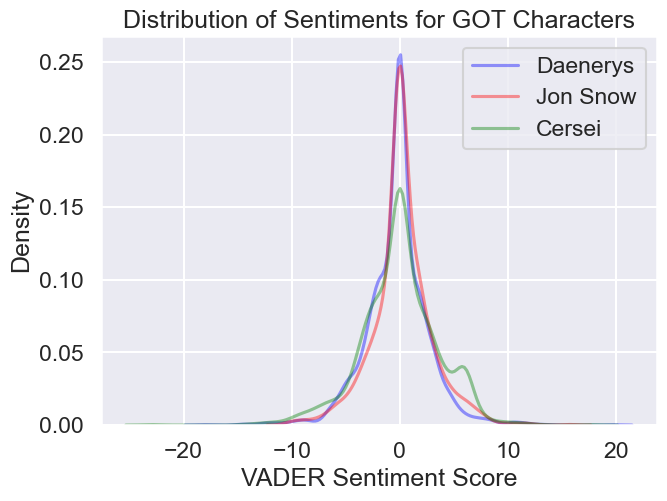

In [150]:
sns.kdeplot(data=got[got['text'].str.contains('daenerys')], x='polarity',
    label='Daenerys', color='blue', alpha=0.4
)
sns.kdeplot(data=got[got['text'].str.contains('jon snow')], x='polarity',
    label='Jon Snow', color='red', alpha=0.4
)
sns.kdeplot(data=got[got['text'].str.contains('cersei')], x='polarity',
    label='Cersei', color='green', alpha=0.4
)

plt.title('Distribution of Sentiments for GOT Characters')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

### Question 2.11
Comment on what you observe in the plot above. Do the location of the peaks, their height or the spread of the distributions differ? What might this suggest about sentiment of these characters?

**Your Response:** The sentiment distribution for all three characters shows that they all peak around zero, thus representing neutral comments. However, Jon Snow has the tallest peak and most consistent spread showing that his sentiments are the most balanced and consistent. Cersei's distribution is the most wide and has a larger nagative tail. This suggests that she is a more controversial character who may recieve more negative sentiments than the others. Finally, Daenerys's distribution falls between these too following the consistency of Jon Snow's distribution, while also have a slightly larger negative tail as Cersei does. 

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [151]:
grader.check_all()

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q2_8 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order.  Then execute the following two commands from the File menu:

* Save and Checkpoint
* Close and Halt

Then submit your .ipynb file to the HW5 assignment in Canvas.